<a href="https://colab.research.google.com/github/aiguozhe01/DIC_Assignment/blob/master/Sprint_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint_03 機械学習スクラッチ　線形回帰

In [10]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter=100, lr=0.1, no_bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)
        self.coef_ = None
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)
        # bias無しの場合はX_0を追加せずパラメータを作成
        if self.no_bias:
            self.coef_ = np.random.rand(len(X[0]))
        # bias有りの場合はX_0 = 1をXにconcatし、パラメータを作成
        else:
            bias = np.ones(len(X)).reshape(-1, 1)
            X = np.concatenate((bias, X), axis=1)
            self.coef_ = np.random.rand(len(X[0]))

        # 検証データに対する学習の有無はX_valとy_valが提示された場合のみに指定
        # hasattr関数を使用し、X_val, y_valが__array__attributeを所持するかで判断
        if hasattr(X_val, '__array__') and hasattr(y_val, '__array__'):
            for i in range(self.num_iter):
                
                h_x_array = self._linear_hypothesis(X)
                pred = self.predict(X_val)
                
                self.coef_ = self._gradient_descent(X, y, h_x_array)

                self.loss[i] = self._cost_function(h_x_array, y)
                self.val_loss[i] = self._cost_function(pred, y_val)
        
        else:
            for i in range(self.num_iter):

                h_array = self._linear_hypothesis(X)
                
                self.coef_ = self._gradient_descent(X, y, h_x_array)

                self.loss[i] = self._cost_function(h_x_array, y)

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        
        theta : 次の形のndarray, shape (n_samples, )
        　パラメータ
        
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        
        """
        # solution = np.matmul(X, self.coef_.T)
        
        return np.matmul(X, self.coef_.T)

    def _gradient_descent(self, X, y, h_x_array):
        """
        fitメソッドで呼び出された際に最急降下法による学習を行う。

        Parameters
        ----------
        self: class関数を引用する。

        X : 次の形のndarray, shape (n_samples, n_features)

        error :

        """
        self.coef_ -= (self.lr/len(X)) * np.matmul((h_x_array - y), X)

        return self.coef_
      
    def _cost_function(self, pred, y):
        return np.sum((pred - y) ** 2) / (2 * len(y))

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        h_theta = np.matmul(X, self.coef_.T)

        return h_theta

## 【問題1】仮定関数

以下の数式で表される線形回帰の仮定関数を実装してください。

$$
h_\theta(x) = \theta_0x_0 + \theta_1x_1+...+\theta_jx_j+...+\theta_nx_n.(x_0=1)
$$

### 【目的】

* 上記の重回帰式を仮定する関数を作成する。

### 【考察】

* $\begin{align}\theta\end{align}$ は直線の傾き（coefficients）を制御している。
* $\begin{align}x_0 = 1\end{align}$ のため、切片は1である。
* 行列 $\begin{align}\theta\end{align}$ と行列 $\begin{align}x_n\end{align}$ の内積（np.dot or np.matmul）を算出する関数を作成する。
* 内積を算出するため、引数Xの行数分の配列数thetaをnp.randomを用いて算出する。

### 【工程順序】
1. np.random（0-10の範囲）を用いて、Xの行数分の配列数thetaのarrayを構築
2. x_train（ここでは引数X）を用いて$\begin{align}h_\theta\end{align}$(x)を求める。


In [ ]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    
    theta : 次の形のndarray, shape (n_samples, )
    　パラメータ
    
    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    Process
    -------    
    'theta' is the coefficients.
    there are n independent variables.
    
    パラメータが２つしかない場合
    
    def hypothesis(theta, X):
        return theta[0] + theta[1]*X
    def cost_calc(theta, X, y):
        return (1/2*m) * np.sum((hypothesis(theta, X) - y)**2)
    
    m = len(X) # number_of_training_data
    def gradient_descent(theta, X, y, epoch, alpha):
        cost = []
        i = 0
        while i < epoch:
            hx = hypothesis(theta, X)
            theta[0] -= alpha * (sum(hx-y)/m)
    
    """
    
    solution = np.matmul(self.coef_.T, X)
    
    return solution

## 【問題2】最急降下法

最急降下法により学習させる実装を行なう。

以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにする。

$\begin{align}
\theta_j := \theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
\end{align}$

$\begin{align}\theta_j\end{align}$：

$\begin{align}\alpha\end{align}$：学習率

$\begin{align}i\end{align}$：サンプルのインデックス

$\begin{align}j\end{align}$：特徴量のインデックス

$\begin{align}m\end{align}$：サンプルの最大インデックス値（繰り返し回数の最大値）

$h_\theta(x^{(i)})$：_linear_hypothesis

$\begin{align}y^{(i)}\end{align}$：y_train

$\begin{align}x_j^{(i)}\end{align}$：X_train

### 【目的】

* ひな形_gradient_descent（勾配降下）を用いて、最急降下法による機械学習が行えるように関数を完成させる。

### 【考察】

* 最急降下法とは、接線の傾き（$\theta$）をゼロに近づくようにxの値を更新していき最適解に収束させる方法。
* := の意味は「左辺を右辺で定義（代入）する」
* 偏微分：特定の文字以外を定数とみなして微分したものを偏微分（偏導関数）と言います。
    * 微分：ある関数の任意の点における傾き（$\theta$）を導く式「導関数」を求めること。
    * 傾き（$\theta$）を求めるには2点間の変化の割合を求めること。
        * $変化の割合=\frac{yの増加量}{xの増加量}$
        

最急降下法のアルゴリズム
1. 対象とする関数を$(h_\theta(x^{(i)})$とし、関数$(h_\theta(x^{(i)})$の引数のベクトルをX
2. $h_\theta(x^{(i)})-y^{(i)}$が偏差となる。


In [ ]:
def _gradient_descent(self, X, y, h_x_array):
    """
    fitメソッドで呼び出された際に最急降下法による学習を行う。

    Parameters
    ----------
    self: class関数を引用する。
    
    X : 次の形のndarray, shape (n_samples, n_features)
    
    error : 

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果    
        
    
    """

    # h_thetaとyはnumpy.ndarrayであること
    # inside_sigma = np.multiply((h_theta - y_train), X_train)
    
    # theta = theta - lr * (1/m) * np.sum(inside_sigma, axis=0)
    # or
    theta -= (sum(_linear_hypothesis(X, theta)-y)/m) * X
    
    self.coef_ -= (self.lr/len(X)) * np.matmul((h_x_array - y), X)

    return self.coef_

## 【問題3】推定

* 仮定関数 $h_\theta(x)$ の出力が推定結果です。

In [ ]:
def predict(self, X):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    h_theta = np.matmul(self.coef_.T, X)

    return h_theta

## 【問題4】平均二乗誤差

* ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成せよ。

In [56]:
def mse(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.sum(y_pred - y) ** 2 / len(y)
    return mse

## 【問題5】目的関数

* 線形回帰の 目的関数（損失関数） を実装せよ。
* これらをself.loss, self.val_lossに記録するようにせよ。

In [51]:
def _cost_function(self, pred, y):
  return np.sum((pred - y) ** 2) / (2 * len(y))

## 【問題6】学習と推定

* House Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なえ。
* scikit-learnによる実装と比べ、正しく動いているかを確認せよ。

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
home_data = pd.read_csv('/content/drive/My Drive/DIC/dataset/House_Prices/house_prices_train.csv')
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#GrLivArea、YearBuilt、SalePriceを抽出
train = home_data.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]

In [8]:
# DataFrameをndarrayに変換
X = np.array(train.iloc[:, :-1])
y = np.array(train.iloc[:, -1])

# データの分割（今回は7：3の割合）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(y_train.shape)

(1022, 2)
(1022,)


In [9]:
# 標準化処理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [57]:
# スクラッチモデルの学習と推定（バイアス無し）
scratch_lr = ScratchLinearRegression(lr=0.1, num_iter=100, no_bias=True, verbose=False)

scratch_lr.fit(X_train_std, y_train, X_val=X_test_std, y_val=y_test)

scratch_pred = scratch_lr.predict(X_test_std)

scratch_mse = mse(scratch_pred, y_test)

print("Non-biasedスクラッチモデルのMSE：{:.3g}".format(scratch_mse))

Non-biasedスクラッチモデルのMSE：1.43e+13


In [58]:
# sklearnモデルの学習と推定
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sk_lr = LinearRegression()

sk_lr.fit(X_train_std, y_train)

sk_pred = sk_lr.predict(X_test_std)

sk_mse = mean_squared_error(y_test, sk_pred)

print("sklearnモデルのMSE：{:.3g}".format(sk_mse))

sklearnモデルのMSE：2.46e+09


## 【問題7】学習曲線のプロット

* 学習曲線を表示する関数を作成し、実行せよ。

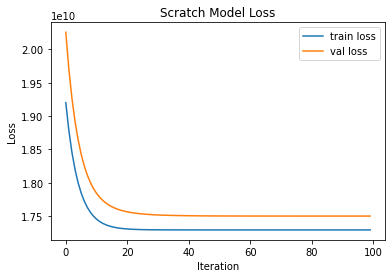

In [59]:
%matplotlib inline

plt.figure()

plt.plot(np.arange(len(scratch_lr.loss)), scratch_lr.loss, label='train loss')
plt.plot(np.arange(len(scratch_lr.loss)), scratch_lr.val_loss, label='val loss')
plt.title("Scratch Model Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()